In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [8]:
df = pd.read_csv('fcc-forum-pageviews.csv')
df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


In [18]:
#Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
# Calculate the 2.5th and 97.5th percentiles
lower_bound = df['value'].quantile(2.5/100)
higher_bound = df['value'].quantile(1-2.5/100)

df_cleaned = df[(df['value']>=lower_bound) & (df['value'] <= higher_bound)]
df_cleaned

,date,value
10,2016-05-19,19736
17,2016-05-26,18060
18,2016-05-27,19997
19,2016-05-28,19044
20,2016-05-29,20325
...,...,...
1294,2019-11-24,138875
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918


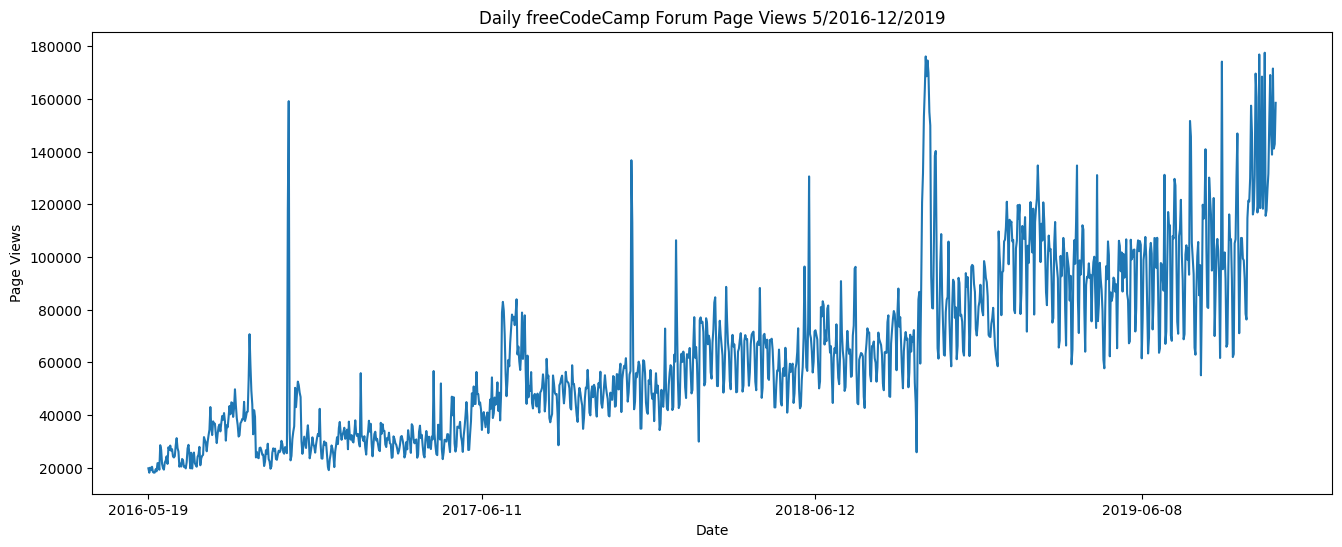

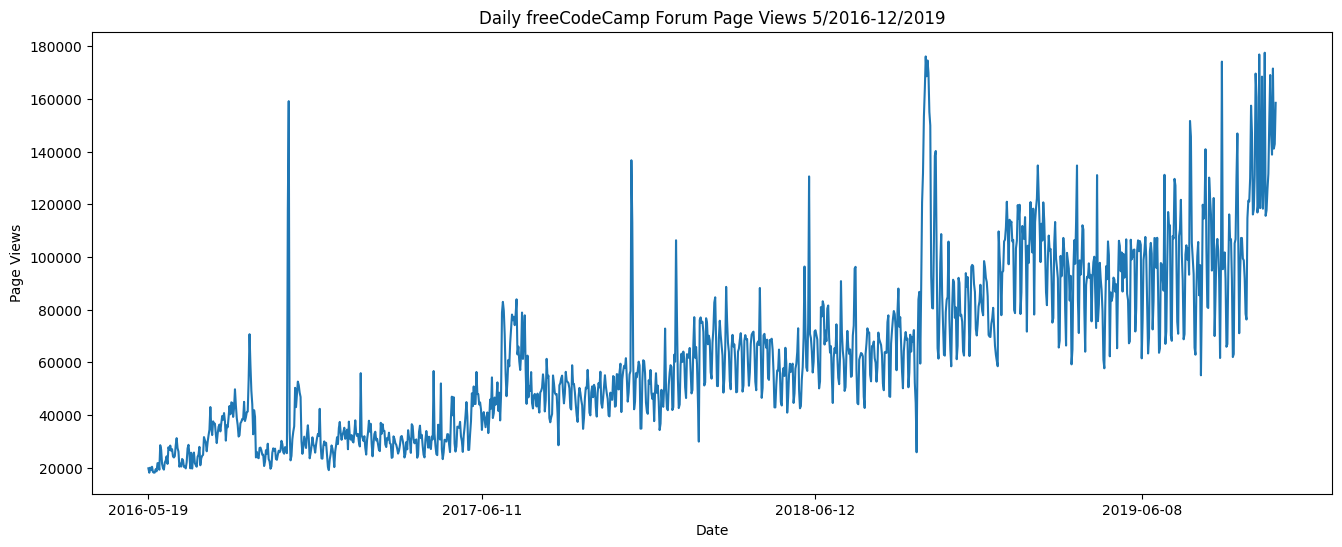

In [37]:
def draw_line_plot():
    # Draw line plot

    fig,ax = plt.subplots(figsize=(16, 6))


    x_axis = df_cleaned['date']
    y_axis = df_cleaned['value']
    ax.plot(x_axis, y_axis)
    ax.set(title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019',
           xlabel='Date',
           ylabel='Page Views')
    # ax.show()

    # Show only selected x-axis values
    selected_ticks = [0, 366, 732, 1090]  # Example: Show only ticks at these positions
    ax.set_xticks(selected_ticks)

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig
draw_line_plot()

In [43]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df_bar_ = df_cleaned.groupby(by = ['year', 'month']).mean().unstack()
df_bar_

C:\Users\Ashley Nguyen\AppData\Local\Temp\ipykernel_59140\1116848506.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_bar_ = df_cleaned.groupby(by = ['year', 'month']).mean().unstack()


value                                                           \
month             1              2             3             4             5    
year                                                                            
2016             NaN            NaN           NaN           NaN  19432.400000   
2017    32785.161290   31113.071429  29369.096774  30878.733333  34244.290323   
2018    58580.096774   65679.000000  62693.774194  62350.833333  56562.870968   
2019   102056.516129  105968.357143  91214.483871  89368.433333  91439.903226   

                                                                               \
month            6             7              8             9              10   
year                                                                            
2016   21875.105263  24109.678571   31049.193548  41476.866667   27398.322581   
2017   43577.500000  65806.838710   47712.451613  47376.800000   47438.709677   
2018   70117.000000  63591.064516   62831.612903  65941.733333  111378.142857   
2019   90435.642857  97236.566667  102717.310345  97268.833333  122802.272727   

                                     
month             11             12  
year                                 
2016    40448.633333   27832.419355  
2017    57701.566667   48420.580645  
2018    78688.333333   80047.483871  
2019   143166.428571  150733.500000

C:\Users\Ashley Nguyen\AppData\Local\Temp\ipykernel_59140\1331904299.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['year'] = pd.DatetimeIndex(df_cleaned['date']).year
C:\Users\Ashley Nguyen\AppData\Local\Temp\ipykernel_59140\1331904299.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['month'] = pd.DatetimeIndex(df_cleaned['date']).month
C:\Users\Ashley Nguyen\AppData\Local\Temp\ipykernel_59140\1331904299.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupB

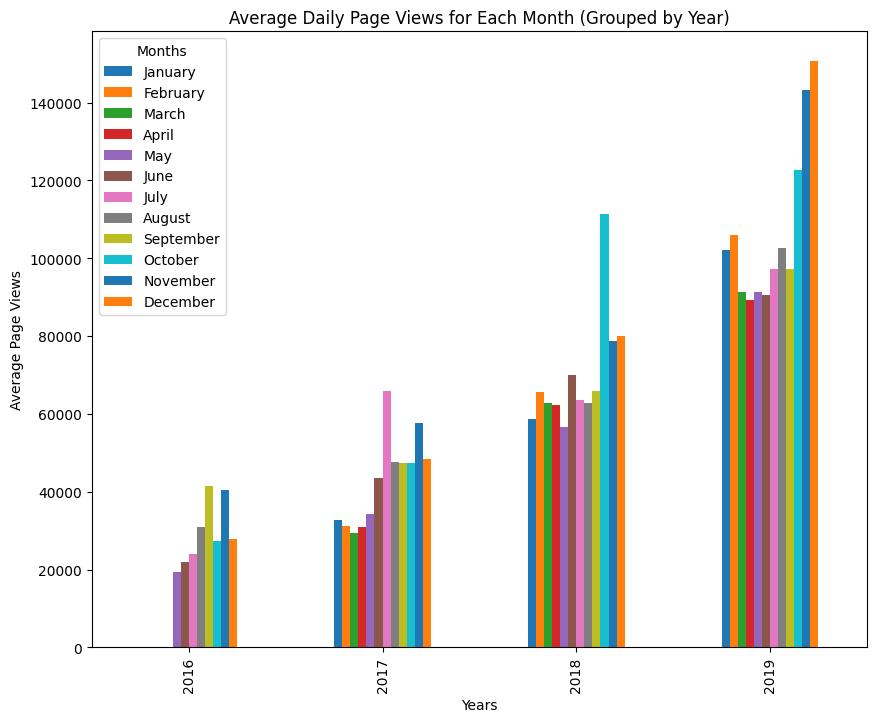

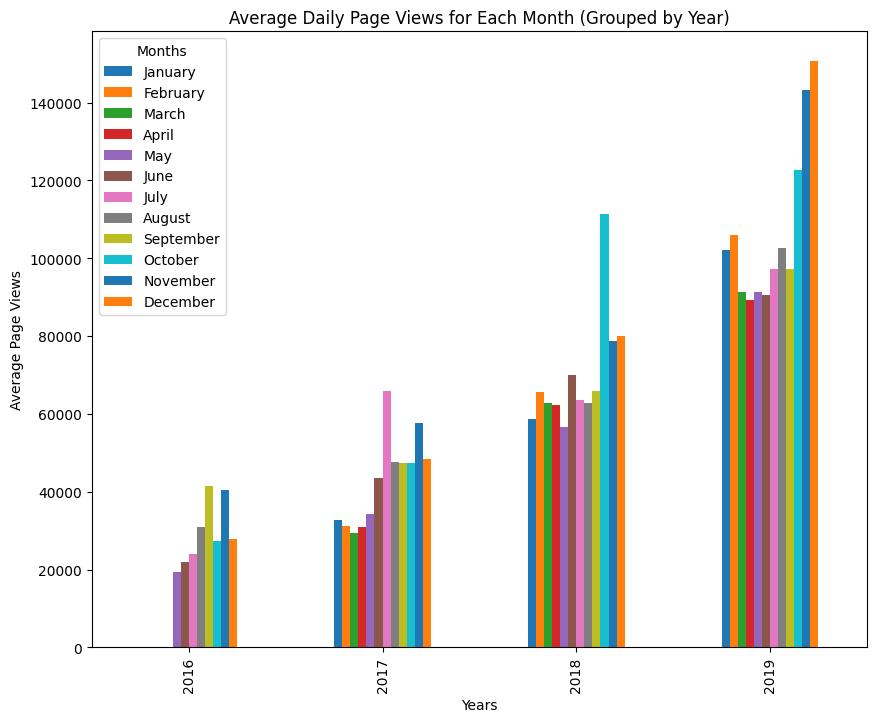

In [41]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_cleaned['year'] = pd.DatetimeIndex(df_cleaned['date']).year
    df_cleaned['month'] = pd.DatetimeIndex(df_cleaned['date']).month
    df_bar = df_cleaned.groupby(by = ['year', 'month']).mean().unstack()

    # Draw bar plot
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']

    # Plot the bar chart
    fig, ax = plt.subplots(figsize=(10, 8))
    df_bar.plot(kind='bar', ax=ax)

    # Set the labels and titles
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')
    ax.set_title('Average Daily Page Views for Each Month (Grouped by Year)')
    ax.legend(title='Months', labels=month_order)

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

draw_bar_plot()

In [ ]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)





    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig